## CRYPTO WALLETS (Crypto Sample to be sent in separate email)
Please open the detail for each of the Crypto Coin Types; BTC and ETH. This is a sample of deposits and payments for the period of January 2023.

PARAMETER DESCRIPTIONS

- Transaction ID: identifies the unique transaction
- Provider Date: indicates the date and time of the transaction
- Amount: transaction amount credited to the customer in USD
- Currency: currency of the transaction credited to the customer (all customer credits are in USD)
- Transaction Status: status of the transaction – all should be approved
- Transaction Type: indicates whether the transaction is a deposit or payout
- Fee: indicates any applicable fees on the transaction
- TYPE: indicates Crypto coin type
- CryptoAmount: indicates the crypto value at time of transaction
- BuyRate: indicates the conversion rate used at the time of transaction

QUESTIONS

If the balance of the wallets were as indicated below as at Dec.31, 2022 please confirm:

1. Calculated Balance of each wallet as at Jan.31, 2023
2. Calculate the revaluation of the USD balance of each wallet (FX loss or gain)
3. Prepare a graph to show the daily volumes and average conversion rates per day for each coin type.
    - Comment on any anomalies

## imports

In [51]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

plt.style.use('dark_background')

## load data from excel

In [2]:
btc_deposits = pd.read_excel('excel_files/Crypto_Sample_BTC.xlsx')
eth_deposits = pd.read_excel('excel_files/Crypto_Sample_ETH.xlsx')
crypto_deposits = pd.concat([btc_deposits, eth_deposits])
columns = ['tx_id', 'datetime', 'usd_amount', 'currency', 'status', 'tx_type', 'fee', 'symbol', 'crypto_amount', 'buy_rate']
crypto_deposits.columns = columns
crypto_deposits = crypto_deposits.set_index('datetime').sort_values(by=['datetime'], ascending=True)
crypto_deposits.loc[crypto_deposits['tx_type'] == 'PAYOUT', ['usd_amount', 'crypto_amount']] *= -1
crypto_deposits

,tx_id,usd_amount,currency,status,tx_type,fee,symbol,crypto_amount,buy_rate
datetime,,,,,,,,,
2023-01-01 00:02:54,48032432,49.90,USD,APPROVED,DEPOSIT,1.74,ETH,0.041833,1192.839616
2023-01-01 00:03:00,48041035,2000.21,USD,APPROVED,DEPOSIT,0.00,BTC,0.120000,16344.060000
2023-01-01 00:03:00,48041067,849.85,USD,APPROVED,DEPOSIT,0.00,BTC,0.050000,16341.360000
2023-01-01 00:03:00,48041048,-715.00,USD,APPROVED,PAYOUT,0.00,BTC,-0.040000,17875.000000
2023-01-01 00:03:00,48041062,410.97,USD,APPROVED,DEPOSIT,0.00,BTC,0.020000,16341.360000
...,...,...,...,...,...,...,...,...,...
2023-01-31 23:55:00,48992750,56.46,USD,APPROVED,DEPOSIT,0.00,BTC,0.002441,23131.760079
2023-01-31 23:55:00,48992701,47.01,USD,APPROVED,DEPOSIT,0.00,BTC,0.002031,23143.612491
2023-01-31 23:57:50,48984745,110.00,USD,APPROVED,DEPOSIT,3.85,ETH,0.069449,1583.904710


In [3]:
crypto_deposits.tail(5)

,tx_id,usd_amount,currency,status,tx_type,fee,symbol,crypto_amount,buy_rate
datetime,,,,,,,,,
2023-01-31 23:55:00,48992750,56.46,USD,APPROVED,DEPOSIT,0.00,BTC,0.002441,23131.760079
2023-01-31 23:55:00,48992701,47.01,USD,APPROVED,DEPOSIT,0.00,BTC,0.002031,23143.612491
2023-01-31 23:57:50,48984745,110.00,USD,APPROVED,DEPOSIT,3.85,ETH,0.069449,1583.904710
2023-01-31 23:57:50,48984721,94.14,USD,APPROVED,DEPOSIT,3.29,ETH,0.059399,1584.893230
2023-01-31 23:58:30,48984780,99.86,USD,APPROVED,DEPOSIT,3.49,ETH,0.063077,1583.221600


## 1. Calculated Balance of each wallet as at Jan.31, 2023

### balance crypto December 2022

In [30]:
crypto_balance_dec22 = {'symbol':['BTC', 'ETH'],
                        'crypto_balance_dec22':[30.88890835, 62.29934006],
                        'usd_balance_dec22':[714194.50, 98633.66]}
crypto_balance_dec22 = pd.DataFrame(crypto_balance_dec22)
crypto_balance_dec22

,symbol,crypto_balance_dec22,usd_balance_dec22
0,BTC,30.888908,714194.50
1,ETH,62.299340,98633.66


### transactions crypto January 2023

In [31]:
crypto_tx_jan23 = crypto_deposits.groupby('symbol')[['crypto_amount', 'usd_amount']].sum()
crypto_tx_jan23 = crypto_tx_jan23.reset_index().rename(columns={'crypto_amount':'crypto_tx_jan23', 'usd_amount':'usd_tx_jan23'})
crypto_tx_jan23

,symbol,crypto_tx_jan23,usd_tx_jan23
0,BTC,1021.466582,22383668.79
1,ETH,651.349450,893801.09


### balance crypto January 2023

In [32]:
crypto_balance_jan23 = crypto_balance_dec22.copy()
crypto_balance_jan23['crypto_balance_jan23'] = crypto_balance_dec22['crypto_balance_dec22'] + crypto_tx_jan23['crypto_tx_jan23']
crypto_balance_jan23['usd_balance_jan23'] = crypto_balance_dec22['usd_balance_dec22'] + crypto_tx_jan23['usd_tx_jan23']
crypto_balance_jan23['avg_tx_rate_jan23'] = crypto_balance_jan23['usd_balance_jan23'] / crypto_balance_jan23['crypto_balance_jan23']
crypto_balance_jan23 = crypto_balance_jan23.drop(columns=['crypto_balance_dec22', 'usd_balance_dec22'])
crypto_balance_jan23

,symbol,crypto_balance_jan23,usd_balance_jan23,avg_tx_rate_jan23
0,BTC,1052.35549,23097863.29,21948.726928
1,ETH,713.64879,992434.75,1390.648683


## 2. Calculate the revaluation of the USD balance of each wallet (FX loss or gain)

### get current prices BTC ETH

In [33]:
url = "https://api.coingecko.com/api/v3/simple/price?ids=bitcoin%2Cethereum&vs_currencies=usd"

response = requests.get(url)

btc_price = response.json()["bitcoin"]["usd"]
eth_price = response.json()["ethereum"]["usd"]

print("BTC price: $" + str(btc_price))
print("ETH price: $" + str(eth_price))

BTC price: $23766
ETH price: $1654.38


### get historical prices December 2023 BTC ETH

In [44]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/history?date=31-12-2022"
response = requests.get(url)
btc_price_dec22 = response.json()["market_data"]["current_price"]["usd"]

url = "https://api.coingecko.com/api/v3/coins/ethereum/history?date=31-12-2022"
response = requests.get(url)
eth_price_dec22 = response.json()["market_data"]["current_price"]["usd"]

print("BTC price on Dec 31, 2022: $" + str(round(btc_price_dec22, 2)))
print("ETH price on Dec 31, 2022: $" + str(round(eth_price_dec22, 2)))

BTC price on Dec 31, 2022: $16604.02
ETH price on Dec 31, 2022: $1199.11


### calculate fx profit or loss at December 2022

In [35]:
crypto_balance_dec22['avg_tx_rate_dec22'] = crypto_balance_dec22['usd_balance_dec22'] / crypto_balance_dec22['crypto_balance_dec22']
crypto_balance_dec22['close_price_dec22'] = [btc_price_dec22, eth_price_dec22]
crypto_balance_dec22['fx_loss_(gain)_dec22'] = crypto_balance_dec22['usd_balance_dec22'] - (crypto_balance_dec22['crypto_balance_dec22'] * crypto_balance_dec22['close_price_dec22'])
crypto_balance_dec22.round(2)

,symbol,crypto_balance_dec22,usd_balance_dec22,avg_tx_rate_dec22,close_price_dec22,fx_loss_(gain)_dec22
0,BTC,30.89,714194.50,23121.39,16604.02,201314.43
1,ETH,62.30,98633.66,1583.22,1199.11,23929.87


### calculate fx profit or loss at 2023

In [36]:
crypto_balance_jan23['close_price_today'] = [btc_price, eth_price]
crypto_balance_jan23['usd_balance_jan23'] = crypto_balance_jan23['usd_balance_jan23'] - crypto_balance_dec22['fx_loss_(gain)_dec22']
crypto_balance_jan23['avg_tx_rate_jan23'] = crypto_balance_jan23['usd_balance_jan23'] / crypto_balance_jan23['crypto_balance_jan23']
crypto_balance_jan23['fx_loss_(gain)_23'] = crypto_balance_jan23['usd_balance_jan23'] - (crypto_balance_jan23['crypto_balance_jan23'] * crypto_balance_jan23['close_price_today'])
crypto_balance_jan23.round(2)

,symbol,crypto_balance_jan23,usd_balance_jan23,avg_tx_rate_jan23,close_price_today,fx_loss_(gain)_23
0,BTC,1052.36,22896548.86,21757.43,23766.00,-2113731.73
1,ETH,713.65,968504.88,1357.12,1654.38,-212141.40


## 3. Prepare a graph to show the daily volumes and average conversion rates per day for each coin type

In [107]:
btc = crypto_deposits.loc[crypto_deposits['symbol'] == 'BTC']
eth = crypto_deposits.loc[crypto_deposits['symbol'] == 'ETH']

btc = btc.groupby(btc.index.to_period('D'))[['crypto_amount', 'buy_rate']].agg({'crypto_amount':'sum', 'buy_rate':'mean'})
btc = btc.reset_index()
btc['crypto_amount_accum'] = btc['crypto_amount'].cumsum()
btc['datetime'] = btc['datetime'].astype(str)

eth = eth.groupby(eth.index.to_period('D'))[['crypto_amount', 'buy_rate']].agg({'crypto_amount':'sum', 'buy_rate':'mean'})
eth = eth.reset_index()
eth['crypto_amount_accum'] = eth['crypto_amount'].cumsum()
eth['datetime'] = eth['datetime'].astype(str)

display(btc.head(3))
display(eth.head(3))

,datetime,crypto_amount,buy_rate,crypto_amount_accum
0,2023-01-01,38.587877,16387.860886,38.587877
1,2023-01-02,-7.967799,16498.991667,30.620078
2,2023-01-03,-32.406799,16516.271068,-1.786721


,datetime,crypto_amount,buy_rate,crypto_amount_accum
0,2023-01-01,54.245460,1194.492492,54.245460
1,2023-01-02,3.590832,1206.523988,57.836292
2,2023-01-03,-2.419393,1210.788003,55.416900


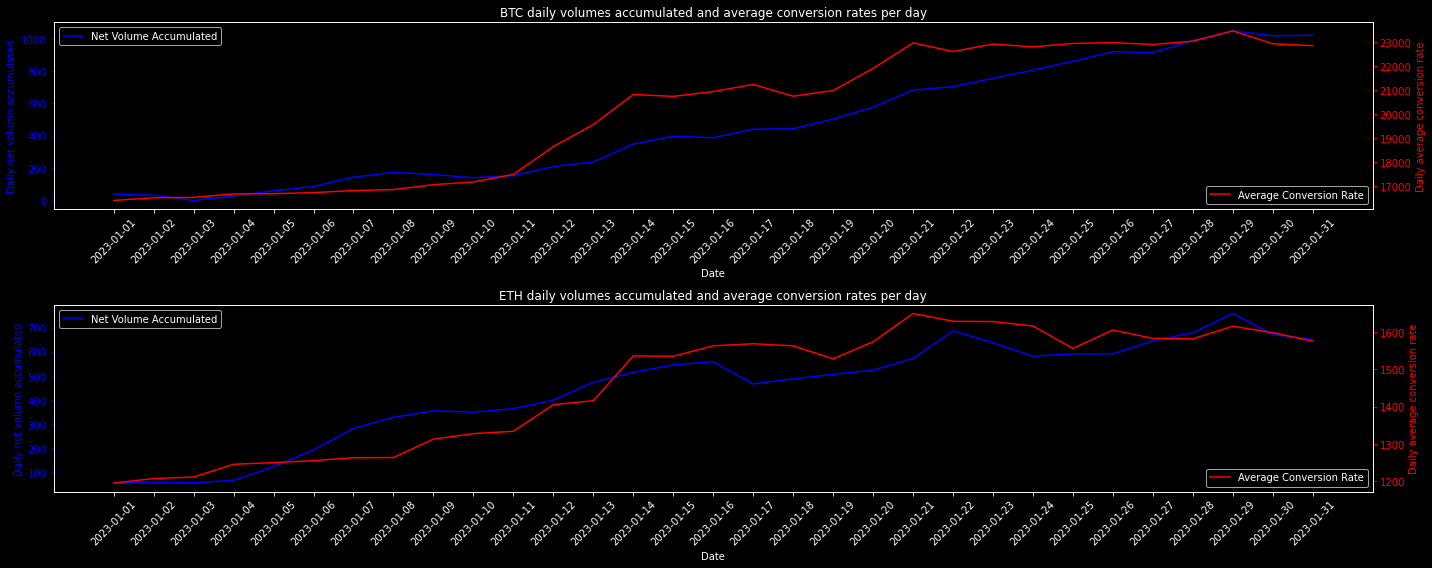

In [116]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,8))

btc_x = btc['datetime']
btc_y1 = btc['crypto_amount_accum']
btc_y2 = btc['buy_rate']

ax1_ = ax1.twinx()

ax1.plot(btc_x, btc_y1, 'b-', label='Net Volume Accumulated')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily net volumn accumulated', color='b')
ax1.tick_params('y', colors='b')

ax1_.plot(btc_x, btc_y2, 'r-', label='Average Conversion Rate')
ax1_.set_ylabel('Daily average conversion rate', color='r')
ax1_.tick_params('y', colors='r')
ax1.set_title('BTC daily volumes accumulated and average conversion rates per day')

eth_x = eth['datetime']
eth_y1 = eth['crypto_amount_accum']
eth_y2 = eth['buy_rate']

ax2_ = ax2.twinx()

ax2.plot(eth_x, eth_y1, 'b-', label='Net Volume Accumulated')
ax2.set_xlabel('Date')
ax2.set_ylabel('Daily net volumn accumulated', color='b')
ax2.tick_params('y', colors='b')

ax2_.plot(eth_x, eth_y2, 'r-', label='Average Conversion Rate')
ax2_.set_ylabel('Daily average conversion rate', color='r')
ax2_.tick_params('y', colors='r')
ax2.set_title('ETH daily volumes accumulated and average conversion rates per day')

plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

ax1.legend(loc='upper left')
ax1_.legend(loc='lower right')
ax2.legend(loc='upper left')
ax2_.legend(loc='lower right')

plt.tight_layout()

plt.show()

## other calculations

In [46]:
crypto_deposits['crypto_amount_recalculated'] = crypto_deposits['usd_amount'] / crypto_deposits['buy_rate']
crypto_deposits['check'] = (crypto_deposits['crypto_amount_recalculated'] - crypto_deposits['crypto_amount']).round(6)
crypto_deposits['usd_difference'] = crypto_deposits['check'] * crypto_deposits['buy_rate']

crypto_tx_jan23_recalculated = crypto_deposits.groupby('symbol')[['crypto_amount_recalculated', 'usd_amount']].sum()
crypto_tx_jan23_recalculated = crypto_tx_jan23_recalculated.reset_index()
crypto_tx_jan23_recalculated

,symbol,crypto_amount_recalculated,usd_amount
0,BTC,1077.888632,22383668.79
1,ETH,651.476703,893801.09


In [47]:
crypto_balance_jan23_recalculated = crypto_balance_dec22.copy()
crypto_balance_jan23_recalculated['crypto_balance_jan23'] = crypto_balance_dec22['crypto_balance_dec22'] + crypto_tx_jan23_recalculated['crypto_amount_recalculated']
crypto_balance_jan23_recalculated['usd_balance_jan23'] = crypto_balance_dec22['usd_balance_dec22'] + crypto_tx_jan23_recalculated['usd_amount']
crypto_balance_jan23_recalculated['avg_tx_rate_jan23'] = crypto_balance_jan23_recalculated['usd_balance_jan23'] / crypto_balance_jan23_recalculated['crypto_balance_jan23']
crypto_balance_jan23_recalculated

,symbol,crypto_balance_dec22,usd_balance_dec22,avg_tx_rate_dec22,close_price_dec22,fx_loss_(gain)_dec22,crypto_balance_jan23,usd_balance_jan23,avg_tx_rate_jan23
0,BTC,30.888908,714194.50,23121.390109,16604.020520,201314.431905,1108.777540,23097863.29,20831.828257
1,ETH,62.299340,98633.66,1583.221586,1199.110497,23929.867367,713.776043,992434.75,1390.400756


In [13]:
crypto_deposits.loc[crypto_deposits['symbol'] == 'ETH'].sort_values(by=['usd_difference'], ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6297 entries, 2023-01-11 02:36:27 to 2023-01-22 08:04:51
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tx_id                       6297 non-null   int64  
 1   usd_amount                  6297 non-null   float64
 2   currency                    6297 non-null   object 
 3   status                      6297 non-null   object 
 4   tx_type                     6297 non-null   object 
 5   fee                         6297 non-null   float64
 6   symbol                      6297 non-null   object 
 7   crypto_amount               6297 non-null   float64
 8   buy_rate                    6297 non-null   float64
 9   crypto_amount_recalculated  6297 non-null   float64
 10  check                       6297 non-null   float64
 11  usd_difference              6297 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 639.5

In [14]:
crypto_deposits.loc[crypto_deposits['symbol'] == 'BTC'].sort_values(by=['usd_difference'], ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164665 entries, 2023-01-16 15:52:00 to 2023-01-27 23:56:00
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tx_id                       164665 non-null  int64  
 1   usd_amount                  164665 non-null  float64
 2   currency                    164665 non-null  object 
 3   status                      164665 non-null  object 
 4   tx_type                     164665 non-null  object 
 5   fee                         164665 non-null  float64
 6   symbol                      164665 non-null  object 
 7   crypto_amount               164665 non-null  float64
 8   buy_rate                    163707 non-null  float64
 9   crypto_amount_recalculated  163707 non-null  float64
 10  check                       163707 non-null  float64
 11  usd_difference              163707 non-null  float64
dtypes: float64(7), int64(1), object(4)
mem

In [15]:
crypto_deposits.loc[(crypto_deposits['symbol'] == 'BTC')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 164665 entries, 2023-01-01 00:03:00 to 2023-01-31 23:55:00
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tx_id                       164665 non-null  int64  
 1   usd_amount                  164665 non-null  float64
 2   currency                    164665 non-null  object 
 3   status                      164665 non-null  object 
 4   tx_type                     164665 non-null  object 
 5   fee                         164665 non-null  float64
 6   symbol                      164665 non-null  object 
 7   crypto_amount               164665 non-null  float64
 8   buy_rate                    163707 non-null  float64
 9   crypto_amount_recalculated  163707 non-null  float64
 10  check                       163707 non-null  float64
 11  usd_difference              163707 non-null  float64
dtypes: float64(7), int64(1), object(4)
mem

In [16]:
crypto_deposits.loc[crypto_deposits['buy_rate'].isna()]

,tx_id,usd_amount,currency,status,tx_type,fee,symbol,crypto_amount,buy_rate,crypto_amount_recalculated,check,usd_difference
datetime,,,,,,,,,,,,
2023-01-01 00:08:00,48041030,-51.75,USD,APPROVED,PAYOUT,0.0,BTC,-0.0,NaN,NaN,NaN,NaN
2023-01-01 00:35:00,48041633,-50.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.0,NaN,NaN,NaN,NaN
2023-01-01 00:35:00,48041274,-56.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.0,NaN,NaN,NaN,NaN
2023-01-01 00:35:00,48041189,-62.91,USD,APPROVED,PAYOUT,0.0,BTC,-0.0,NaN,NaN,NaN,NaN
2023-01-01 00:35:00,48041225,-65.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27 19:35:00,48853368,-89.62,USD,APPROVED,PAYOUT,0.0,BTC,-0.0,NaN,NaN,NaN,NaN
2023-01-27 19:54:00,48855944,-100.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.0,NaN,NaN,NaN,NaN
2023-01-27 19:54:00,48856190,-50.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.0,NaN,NaN,NaN,NaN


In [45]:
crypto_deposits.loc[crypto_deposits['tx_type'] == 'PAYOUT'].head(5)

,tx_id,usd_amount,currency,status,tx_type,fee,symbol,crypto_amount,buy_rate,crypto_amount_recalculated,check,usd_difference
datetime,,,,,,,,,,,,
2023-01-01 00:03:00,48041048,-715.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.04,17875.0,-0.04,0.0,0.0
2023-01-01 00:03:00,48040650,-306.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.02,15300.0,-0.02,0.0,0.0
2023-01-01 00:03:00,48040813,-305.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.02,15250.0,-0.02,0.0,0.0
2023-01-01 00:08:00,48041166,-615.00,USD,APPROVED,PAYOUT,0.0,BTC,-0.04,15375.0,-0.04,0.0,0.0
2023-01-01 00:08:00,48041159,-227.27,USD,APPROVED,PAYOUT,0.0,BTC,-0.01,22727.0,-0.01,0.0,0.0
